In [31]:
import torch
import os
import matplotlib.pyplot as plt
from utils.data_loader import get_dataloaders
from models.dense_baseline import get_baseline
from models.moe_model import MoEModel
from utils.visualization import HistoryLogger, plot_learning_curves, plot_expert_utilization, compare_params_vs_performance, plot_expert_heatmap
from train import train_baseline, train_moe

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [32]:
# Load Data
# Using a reduced batch size if running on CPU, defaults to 128
batch_size = 64
train_loader, val_loader, test_loader, num_classes, img_size = get_dataloaders(batch_size=batch_size)

print(f"Num Classes: {num_classes}, Image Size: {img_size}")

Loaded CIFAR-100: 45000 train, 5000 val, 10000 test images.
Num Classes: 100, Image Size: (3, 32, 32)


In [33]:
# Configuration for the test run
epochs = 10
save_dir = './test_results'
os.makedirs(save_dir, exist_ok=True)

# 1. Train MoE Model
print("=== Training MoE Model ===")
moe_model = MoEModel(num_experts=8, num_classes=num_classes, input_channels=img_size[0]).to(device)
moe_save_path = os.path.join(save_dir, 'moe_model.pth')

train_moe(moe_model, train_loader, val_loader, test_loader, epochs, device, moe_save_path, aux_weight=5.0)

=== Training MoE Model ===
Starting MoE training on cuda with aux_weight=5.0


Epoch 1/10 [Train MoE]: 100%|██████████| 704/704 [00:06<00:00, 107.31it/s, loss=4.46, acc=5.14]


Epoch 1: Train Acc: 5.14%, Val Acc: 4.78%, Val Loss: 4.3418, Test Acc: 7.02%


Epoch 2/10 [Train MoE]: 100%|██████████| 704/704 [00:09<00:00, 73.68it/s, loss=3.95, acc=9.86]


Epoch 2: Train Acc: 9.86%, Val Acc: 11.92%, Val Loss: 3.8478, Test Acc: 12.86%


Epoch 3/10 [Train MoE]: 100%|██████████| 704/704 [00:10<00:00, 66.21it/s, loss=3.84, acc=11.9]


Epoch 3: Train Acc: 11.89%, Val Acc: 13.14%, Val Loss: 3.7785, Test Acc: 14.29%


Epoch 4/10 [Train MoE]: 100%|██████████| 704/704 [00:10<00:00, 65.43it/s, loss=3.85, acc=11.9]


Epoch 4: Train Acc: 11.90%, Val Acc: 13.04%, Val Loss: 3.7631, Test Acc: 14.60%


Epoch 5/10 [Train MoE]: 100%|██████████| 704/704 [00:10<00:00, 66.27it/s, loss=3.67, acc=14.8]


Epoch 5: Train Acc: 14.84%, Val Acc: 15.92%, Val Loss: 3.6397, Test Acc: 17.51%


Epoch 6/10 [Train MoE]: 100%|██████████| 704/704 [00:10<00:00, 69.50it/s, loss=3.56, acc=16.9]


Epoch 6: Train Acc: 16.93%, Val Acc: 17.10%, Val Loss: 3.5763, Test Acc: 19.88%


Epoch 7/10 [Train MoE]: 100%|██████████| 704/704 [00:10<00:00, 68.81it/s, loss=3.46, acc=18.6]


Epoch 7: Train Acc: 18.56%, Val Acc: 19.72%, Val Loss: 3.4267, Test Acc: 22.87%


Epoch 8/10 [Train MoE]: 100%|██████████| 704/704 [00:10<00:00, 69.37it/s, loss=3.33, acc=21.3]


Epoch 8: Train Acc: 21.32%, Val Acc: 21.68%, Val Loss: 3.3396, Test Acc: 24.30%


Epoch 9/10 [Train MoE]: 100%|██████████| 704/704 [00:10<00:00, 66.75it/s, loss=3.15, acc=24.3]


Epoch 9: Train Acc: 24.29%, Val Acc: 24.06%, Val Loss: 3.1833, Test Acc: 27.02%


Epoch 10/10 [Train MoE]: 100%|██████████| 704/704 [00:10<00:00, 65.26it/s, loss=3.02, acc=27.2]


Epoch 10: Train Acc: 27.20%, Val Acc: 27.24%, Val Loss: 3.0671, Test Acc: 30.24%
MoE Training finished. Final Test Accuracy: 30.24%


In [34]:
# 2. Train Baseline (Width x1.0)
print("\n=== Training Baseline (Width x1.0) ===")
baseline_w1 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=1.0).to(device)
baseline_w1_save_path = os.path.join(save_dir, 'baseline_w1.0.pth')

train_baseline(baseline_w1, train_loader, val_loader, test_loader, epochs, device, baseline_w1_save_path)


=== Training Baseline (Width x1.0) ===
Starting Dense Baseline training on cuda...


Epoch 1/10 [Train]:   0%|          | 0/704 [00:00<?, ?it/s]

Epoch 1/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 136.32it/s, loss=4.08, acc=7]   


Epoch 1: Train Acc: 7.00%, Val Acc: 9.94%, Val Loss: 3.8808, Test Acc: 11.18%


Epoch 2/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 137.73it/s, loss=3.8, acc=11.2] 


Epoch 2: Train Acc: 11.22%, Val Acc: 9.36%, Val Loss: 3.9205, Test Acc: 11.19%


Epoch 3/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 138.29it/s, loss=3.61, acc=14.7]


Epoch 3: Train Acc: 14.66%, Val Acc: 14.86%, Val Loss: 3.5804, Test Acc: 17.81%


Epoch 4/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 137.00it/s, loss=3.45, acc=17.5]


Epoch 4: Train Acc: 17.51%, Val Acc: 16.60%, Val Loss: 3.4843, Test Acc: 19.17%


Epoch 5/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 136.52it/s, loss=3.3, acc=20.1] 


Epoch 5: Train Acc: 20.12%, Val Acc: 21.18%, Val Loss: 3.2947, Test Acc: 23.76%


Epoch 6/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 136.25it/s, loss=3.12, acc=23.1]


Epoch 6: Train Acc: 23.09%, Val Acc: 24.24%, Val Loss: 3.0909, Test Acc: 26.60%


Epoch 7/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 134.39it/s, loss=2.96, acc=26.2]


Epoch 7: Train Acc: 26.20%, Val Acc: 26.50%, Val Loss: 2.9522, Test Acc: 30.64%


Epoch 8/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 132.86it/s, loss=2.8, acc=29.6] 


Epoch 8: Train Acc: 29.57%, Val Acc: 28.54%, Val Loss: 2.8663, Test Acc: 31.37%


Epoch 9/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 128.60it/s, loss=2.64, acc=33]  


Epoch 9: Train Acc: 32.98%, Val Acc: 31.92%, Val Loss: 2.7193, Test Acc: 35.00%


Epoch 10/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.90it/s, loss=2.51, acc=35.3]


Epoch 10: Train Acc: 35.32%, Val Acc: 33.46%, Val Loss: 2.6208, Test Acc: 37.40%
Training finished. Final Test Accuracy: 37.40%


In [35]:
# 3. Train Baseline (Width x2.0)
print("\n=== Training Baseline (Width x2.0) ===")
baseline_w2 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=2.0).to(device)
baseline_w2_save_path = os.path.join(save_dir, 'baseline_w2.0.pth')

train_baseline(baseline_w2, train_loader, val_loader, test_loader, epochs, device, baseline_w2_save_path)


=== Training Baseline (Width x2.0) ===
Starting Dense Baseline training on cuda...


Epoch 1/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.75it/s, loss=4.27, acc=4.46]


Epoch 1: Train Acc: 4.46%, Val Acc: 7.70%, Val Loss: 3.9183, Test Acc: 9.12%


Epoch 2/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.69it/s, loss=3.86, acc=10.1]


Epoch 2: Train Acc: 10.14%, Val Acc: 10.80%, Val Loss: 3.8741, Test Acc: 11.94%


Epoch 3/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 131.39it/s, loss=3.61, acc=14.4]


Epoch 3: Train Acc: 14.38%, Val Acc: 14.72%, Val Loss: 3.6040, Test Acc: 18.89%


Epoch 4/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.21it/s, loss=3.38, acc=18.5]


Epoch 4: Train Acc: 18.55%, Val Acc: 18.12%, Val Loss: 3.3686, Test Acc: 20.87%


Epoch 5/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 131.38it/s, loss=3.18, acc=22.5]


Epoch 5: Train Acc: 22.50%, Val Acc: 23.46%, Val Loss: 3.1635, Test Acc: 26.66%


Epoch 6/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 127.51it/s, loss=2.98, acc=26.3]


Epoch 6: Train Acc: 26.33%, Val Acc: 26.90%, Val Loss: 3.0004, Test Acc: 29.79%


Epoch 7/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 128.84it/s, loss=2.77, acc=30.1]


Epoch 7: Train Acc: 30.12%, Val Acc: 30.12%, Val Loss: 2.7842, Test Acc: 33.15%


Epoch 8/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.59it/s, loss=2.57, acc=34.5]


Epoch 8: Train Acc: 34.47%, Val Acc: 31.06%, Val Loss: 2.7109, Test Acc: 36.10%


Epoch 9/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 128.63it/s, loss=2.39, acc=38.3]


Epoch 9: Train Acc: 38.26%, Val Acc: 36.10%, Val Loss: 2.5039, Test Acc: 40.09%


Epoch 10/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.69it/s, loss=2.26, acc=41.1]


Epoch 10: Train Acc: 41.14%, Val Acc: 38.56%, Val Loss: 2.4036, Test Acc: 42.41%
Training finished. Final Test Accuracy: 42.41%


In [36]:
# Load Histories
moe_hist_path = moe_save_path.replace('.pth', '_history.json')
base_w1_hist_path = baseline_w1_save_path.replace('.pth', '_history.json')
base_w2_hist_path = baseline_w2_save_path.replace('.pth', '_history.json')

history_moe = HistoryLogger.load(moe_hist_path).history
history_base_w1 = HistoryLogger.load(base_w1_hist_path).history
history_base_w2 = HistoryLogger.load(base_w2_hist_path).history

print("Histories loaded.")

Histories loaded.


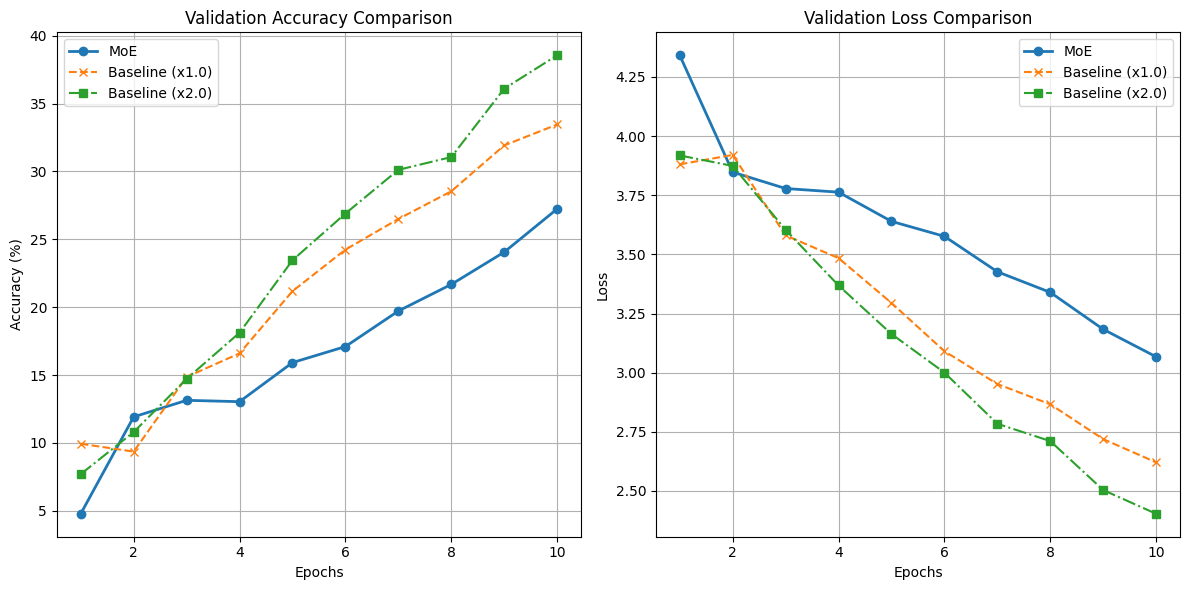

In [37]:
# Visualization: 3-Way Comparison
epochs_range = range(1, len(history_moe['train_acc']) + 1)

plt.figure(figsize=(12, 6))

# Plot Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_moe['val_acc'], label='MoE', linewidth=2, marker='o')
plt.plot(epochs_range, history_base_w1['val_acc'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_acc'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_moe['val_loss'], label='MoE', linewidth=2, marker='o')
plt.plot(epochs_range, history_base_w1['val_loss'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_loss'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Expert Utilization Plot:


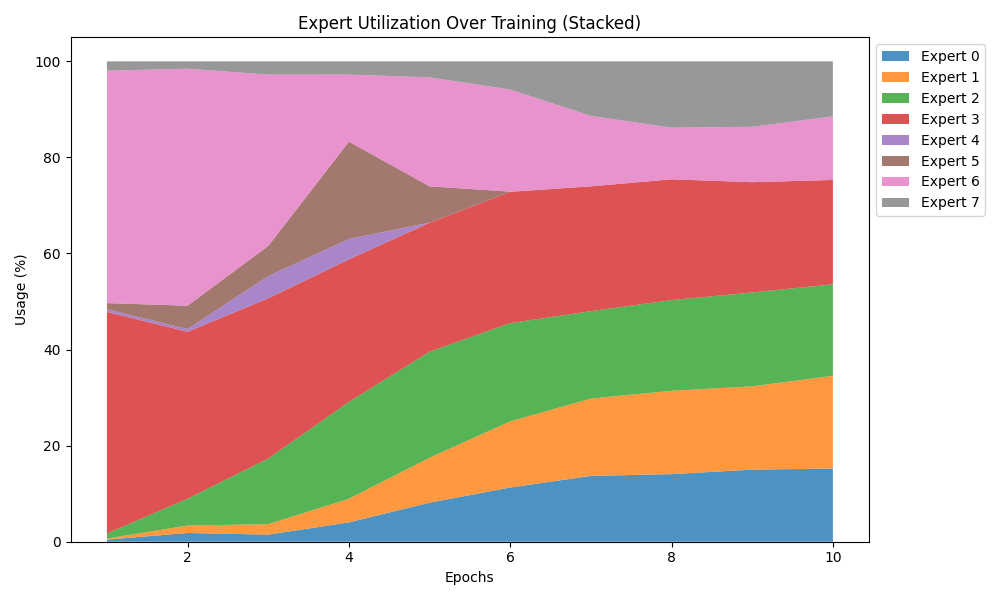

In [38]:
# Visualization: Expert Utilization
from IPython.display import Image, display

# Call the library function
plot_expert_utilization(HistoryLogger.load(moe_hist_path), save_dir)

# Display the saved image
print("Expert Utilization Plot:")
display(Image(filename=os.path.join(save_dir, 'expert_utilization_evolution.png')))

Model Data: [{'name': 'MoE (Top-1)', 'params': 17369960, 'accuracy': 27.24}, {'name': 'Baseline (x1.0)', 'params': 2168548, 'accuracy': 33.46}, {'name': 'Baseline (x2.0)', 'params': 8568164, 'accuracy': 38.56}]
Params vs Performance Plot:


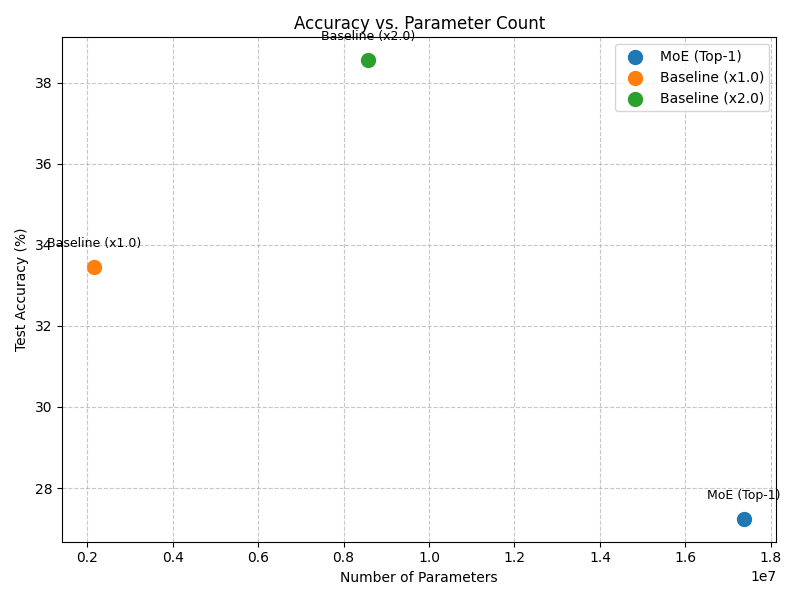

In [39]:
# Visualization: Parameters vs Performance

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Gather data
models_data = [
    {
        'name': 'MoE (Top-1)',
        'params': count_parameters(moe_model),
        'accuracy': history_moe['val_acc'][-1]
    },
    {
        'name': 'Baseline (x1.0)',
        'params': count_parameters(baseline_w1),
        'accuracy': history_base_w1['val_acc'][-1]
    },
    {
        'name': 'Baseline (x2.0)',
        'params': count_parameters(baseline_w2),
        'accuracy': history_base_w2['val_acc'][-1]
    }
]

print("Model Data:", models_data)

# Plot
compare_params_vs_performance(models_data, os.path.join(save_dir, 'params_vs_perf.png'))
print("Params vs Performance Plot:")
display(Image(filename=os.path.join(save_dir, 'params_vs_perf.png')))